# Facebook Ad-Campaigns Analysis /Sales-Prediction
https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking

# Dataset
https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking

**Cluster Analysis for Ad Conversions Data**
- The data used in this project is from an anonymous organisation’s social media ad campaign. The data file can be downloaded from here. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1) **ad_id**: an unique ID for each ad.  
2) **xyz_campaign_id**: an ID associated with each ad campaign of XYZ company.  
3) **fb_campaign_id**: an ID associated with how Facebook tracks each campaign.  
4) **age**: age of the person to whom the ad is shown.  
5) **gender**: gender of the person to whim the add is shown  
6) **interest**: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).  
7) **Impressions**: the number of times the ad was shown.  
8) **Clicks**: number of clicks on for that ad.   
9) **Spent**: Amount paid by company xyz to Facebook, to show that ad.  
10) **Total conversion**: Total number of people who enquired about the product after seeing the ad.  
11) **Approved conversion**: Total number of people who bought the product after seeing the ad.  
   

Social Media Ad Campaign marketing is a leading source of **Sales Conversion** and i have made this data available for the benefit of Businesses using Google Adwords to **track Conversions**

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import koreanize_matplotlib
from IPython.display import set_matplotlib_formats

# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며 
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina' # 글씨 선명하게 출력하는 설정

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

# Loading data

In [3]:
df = pd.read_csv("../data/KAG_conversion_data.csv")

In [4]:
# 데이터 프레임 5줄 출력
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
# 결측치 확인
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

# Exploratory Data Analysis

In [6]:
df.shape

(1143, 11)

In [7]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


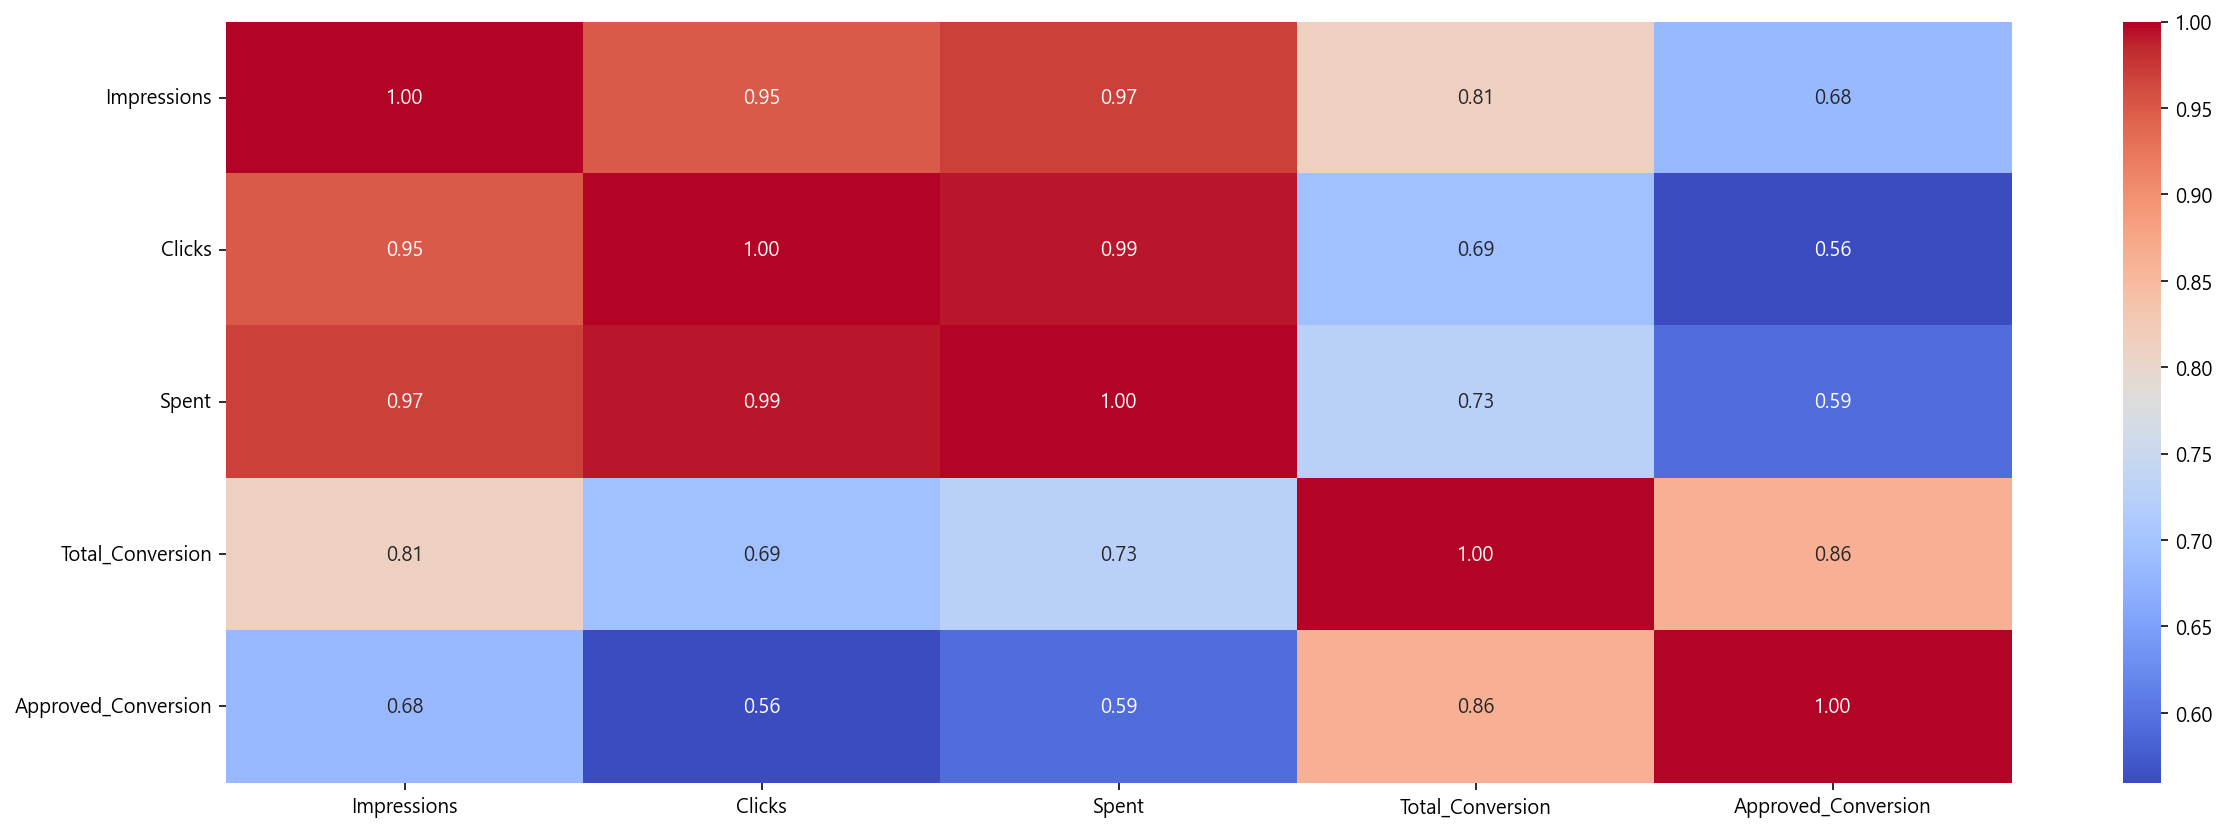

In [8]:
# Correlation Matrix
plt.figure(figsize=(20, 7))
g = sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(), # 피어슨 상관계수로 상관계수 계산
                annot=True, # 숫자 표시
                fmt=".2f", # 소수점 두 자리수
                cmap="coolwarm")

**상관계수**
- 상관계수는 변수들 간의 관계를 알아볼 때 유용한 개념 
- 특정 데이터에 대한 상관관계를 볼 수 있다. (상관계수는 -1부터 1사이로 구성)
    - 뚜렷한 양적 선형관계: 0.3부터 0.7 사이
    - 강한 양적 상관관계: 0.7 이상

- Impressions(노출수)는 Approved_Conversion보다 Clicks(클릭수), Spent(비용)과 강한 양적 상관관계를 보인다.
- Total_Conversion(광고본 후 문의수)는 반대로 Clicks(클릭수), Spent(비용)보다 Approved_Conversion(광고를 본 후 전환 수)와 강한 양적 상관관계가 있다.

**Regplot**
- 서로 다른 2개의 연속 변수 사이의 산점도, 선형회귀분석에 의한 회귀선 시각화   
https://seaborn.pydata.org/generated/seaborn.regplot.html   
https://jehyunlee.github.io/2022/06/06/Python-DS-103-snsreglmplot/

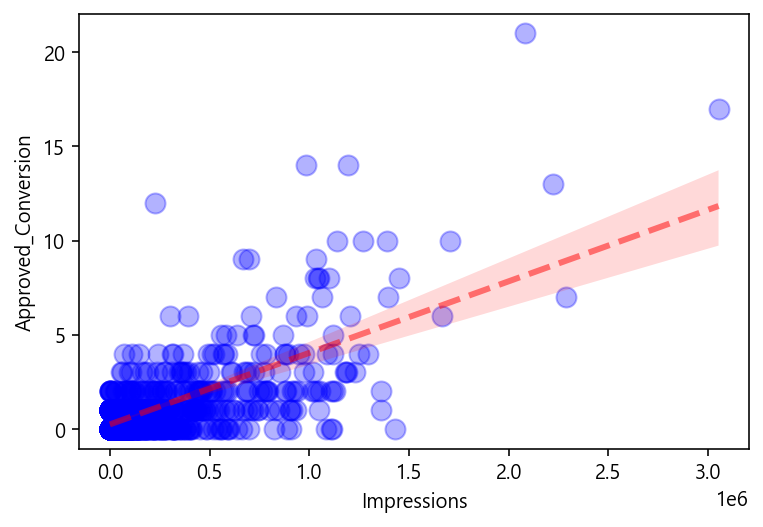

In [9]:
# regplot을 이용해서 Impressions와 Approved_Conversion간 관계 시각화
g = sns.regplot(x="Impressions", y="Approved_Conversion", data=df, color="r",
            scatter_kws={"fc":"b", "ec":"b", "s":100, "alpha":0.3}, 
            line_kws={"lw":3, "ls":"--","alpha":0.5})

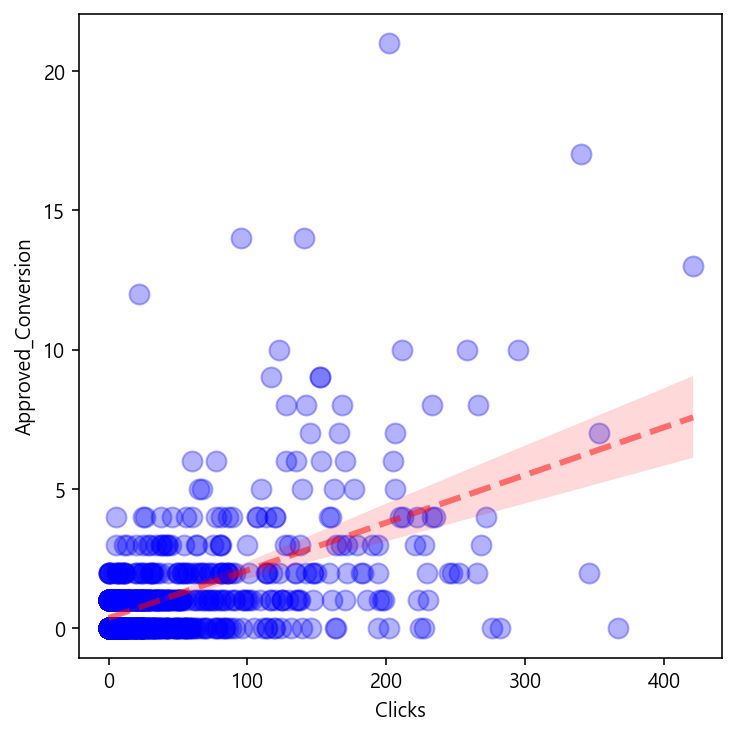

In [10]:
# regplot을 이용해서 각 Clicks와 Approved_Conversion간의 관계 시각화
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
g = sns.regplot(x="Clicks", y="Approved_Conversion", data=df, ax=ax,
                scatter_kws={"fc":"b", "ec":"b", "s":100, "alpha":0.3},
                color="r", line_kws={"lw":3, "ls":"--","alpha":0.5})

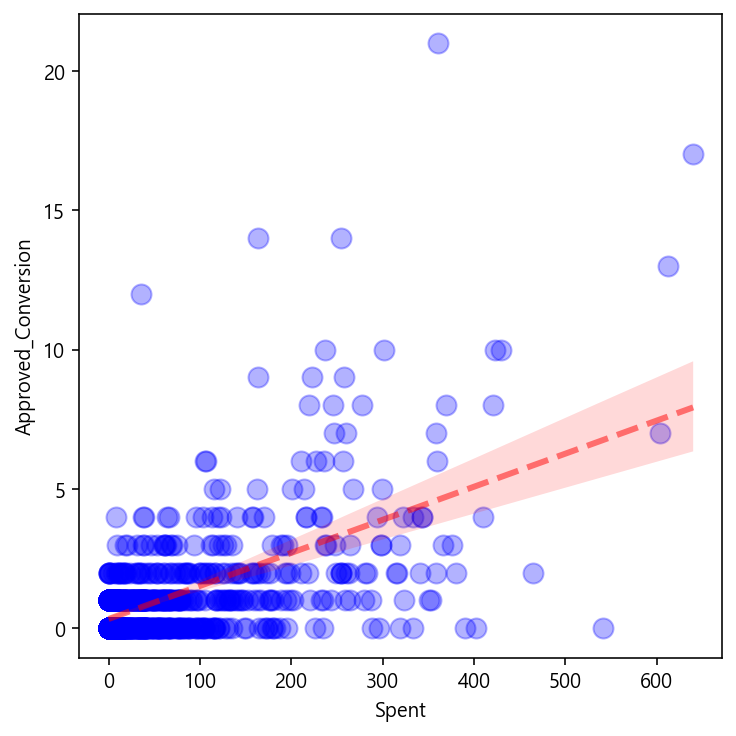

In [11]:
# regplot을 이용해서 각 Spent와 Approved_Conversion간의 관계 시각화
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
g = sns.regplot(x="Spent", y="Approved_Conversion", data=df, ax=ax,
                scatter_kws={"fc":"b", "ec":"b", "s":100, "alpha":0.3},
                color="r", line_kws={"lw":3, "ls":"--","alpha":0.5})

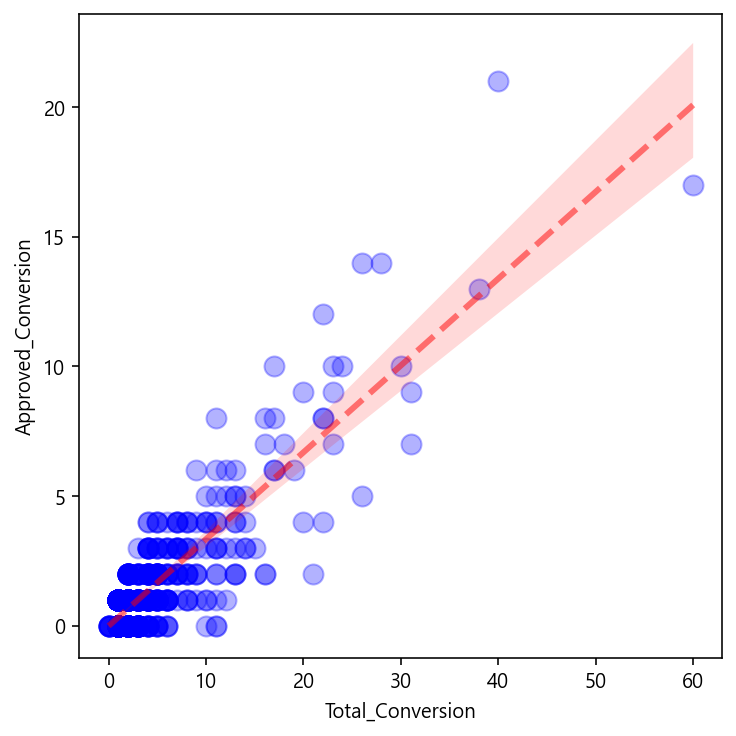

In [12]:
# regplot을 이용해서 각 Total_Conversion와 Approved_Conversion간의 관계 시각화
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
g = sns.regplot(x="Total_Conversion", y="Approved_Conversion", data=df, ax=ax,
                scatter_kws={"fc":"b", "ec":"b", "s":100, "alpha":0.3},
                color="r", line_kws={"lw":3, "ls":"--","alpha":0.5})

# Campaigns

In [13]:
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178], dtype=int64)

In [14]:
# xyz 회사의 광고 캠페인 존재 3개. 각 캠페인을 직관적으로 이해하기 위해서 "campaignA", "campaignB", "campaignC"라는 이름 붙이기
df["xyz_campaign_id"].replace({916:"campaign_a",936:"campaign_b",1178:"campaign_c"}, inplace=True)

In [15]:
df['xyz_campaign_id'].unique()

array(['campaign_a', 'campaign_b', 'campaign_c'], dtype=object)

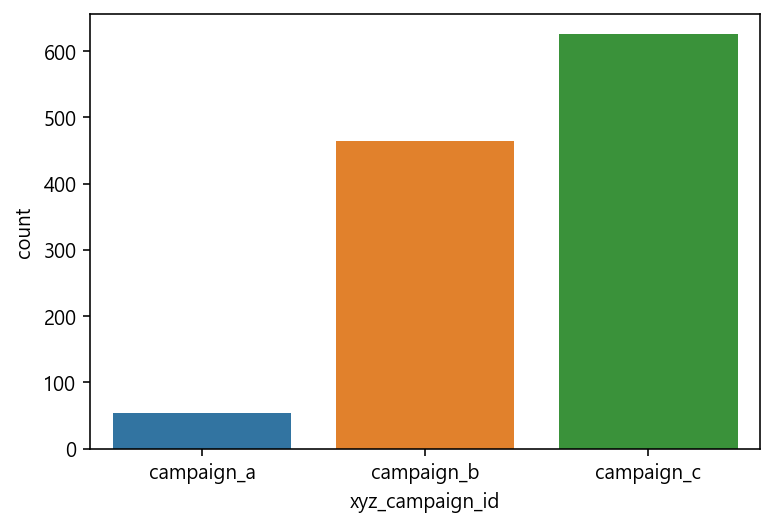

In [16]:
# 각 캠페인별 개수
sns.countplot(x ='xyz_campaign_id', data = df) 
plt.show() 

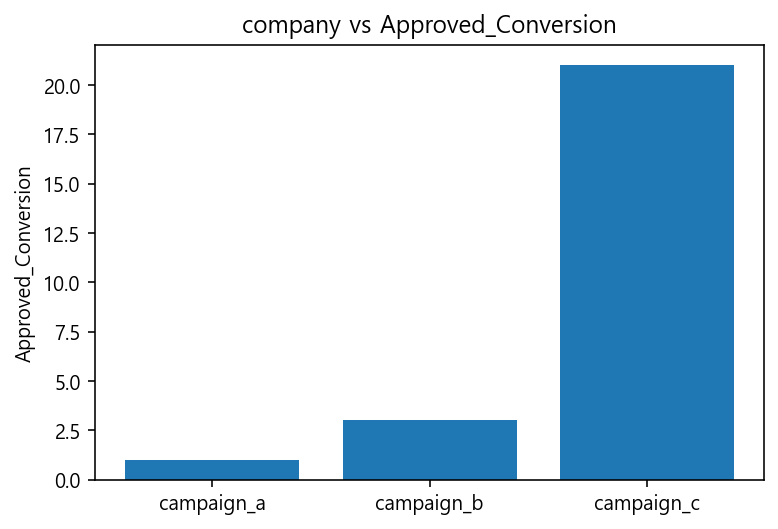

In [17]:
# Approved_Conversion(캠페인별, Approved_Conversion)
# Creating our bar plot
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("company vs Approved_Conversion")
plt.show()

위의 두 그래프에서 
campaign_c가 가장 많은 광고를 집행하고 있으며, 더 나은 Approved_conversion 카운트를 가지고 있다는 것을 확인할 수 있다.  
즉, 대부분의 사람들이 campaign_c의 광고를 보고 난 후 제품을 구입했다.

## Age

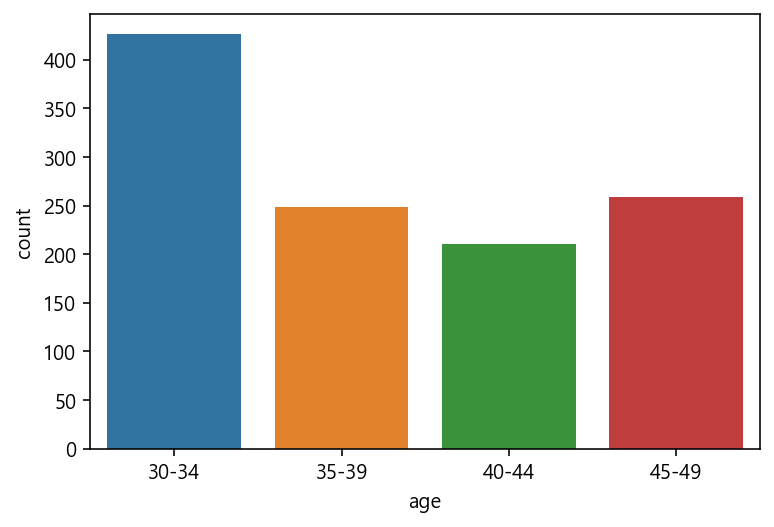

In [18]:
# 연령대별 개수
sns.countplot(x ='age', data = df) 
plt.show() 

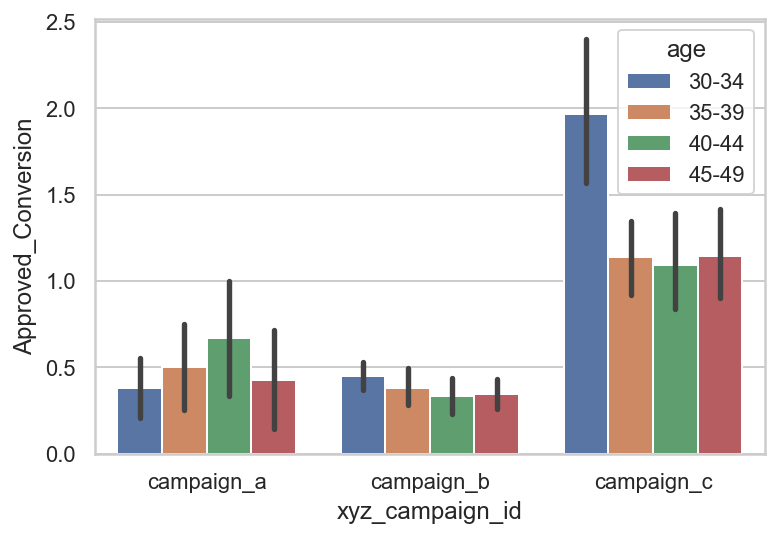

In [19]:
sns.set(style="whitegrid")
g = sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=df)

campaign_b와 campaign_c에서는 30-34세의 연령대가 더 많은 관심을 보이는 반면, campaign_a는 40-44세의 연령대가 더 많은 관심을 보인다.

## Gender

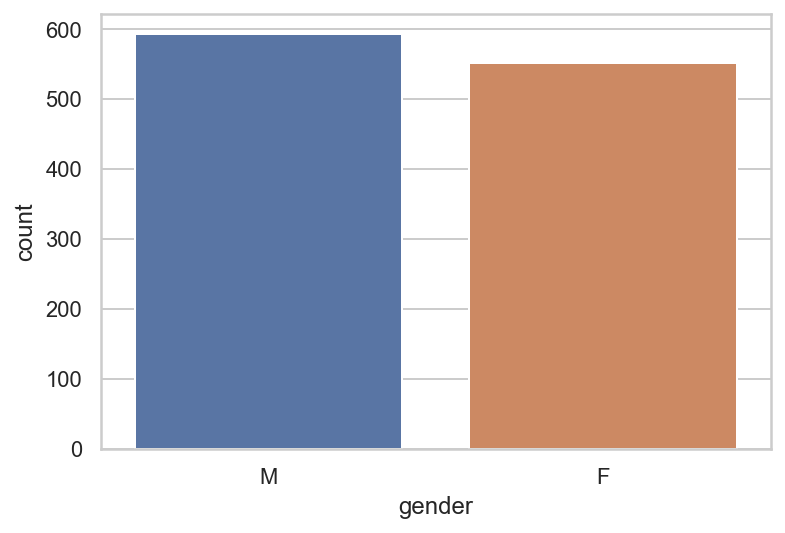

In [20]:
# 성별 개수
sns.countplot(x ='gender', data = df) 
plt.show() 

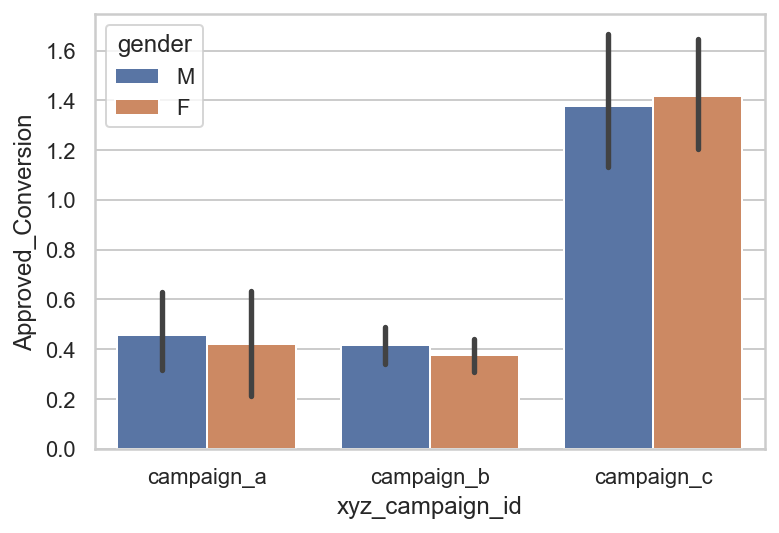

In [21]:
sns.set(style="whitegrid")
g = sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"], data=df)

거의 비슷하지만 campaign_a와 campaign_b에서는 여성, campaign_c에서는 남성이 광고를 본 후 약간 더 많은 구매가 발생했다.

## Interest

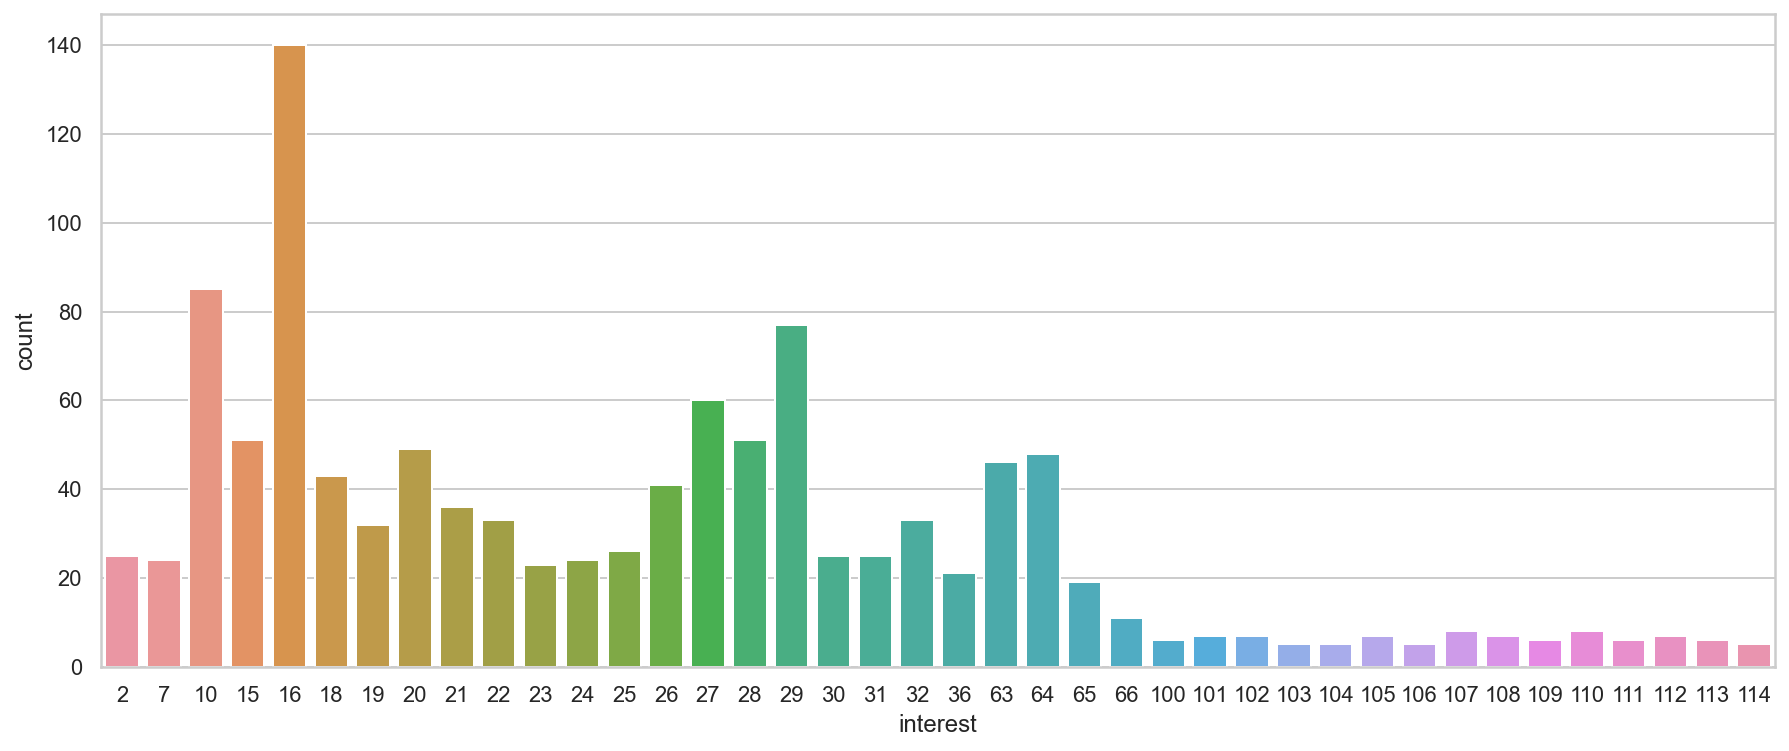

In [22]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='interest', data=df) 
plt.show() 

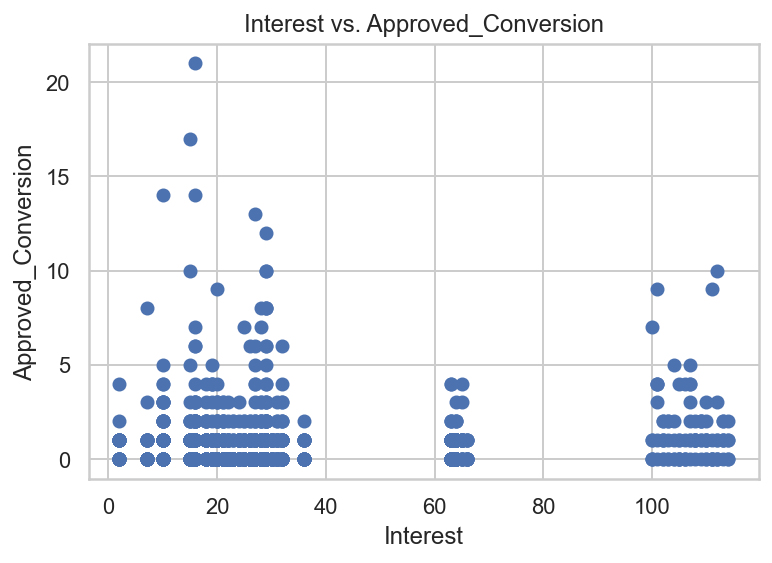

In [24]:
plt.scatter(df["interest"], df["Approved_Conversion"])
plt.title("Interest vs. Approved_Conversion")
plt.xlabel("Interest")
plt.ylabel("Approved_Conversion")
plt.show()

In [25]:
df[df['interest'] > 100]['Approved_Conversion'].mean()

1.5280898876404494

In [26]:
df[df['interest'] <= 100]['Approved_Conversion'].mean()

0.8946869070208728

'100 > interest(관심)'의 경우, 100 이상인 경우보다 수는 적지만 평균 Approved Conversion은 더 높았다. 나머지 분포는 예상했던 대로.

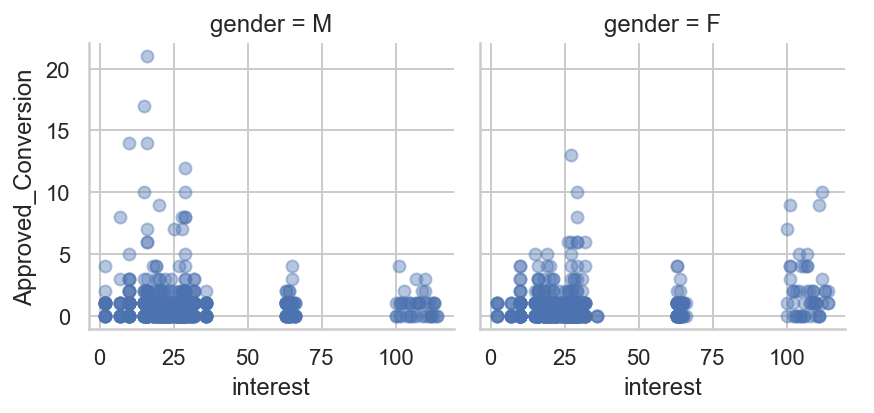

In [60]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

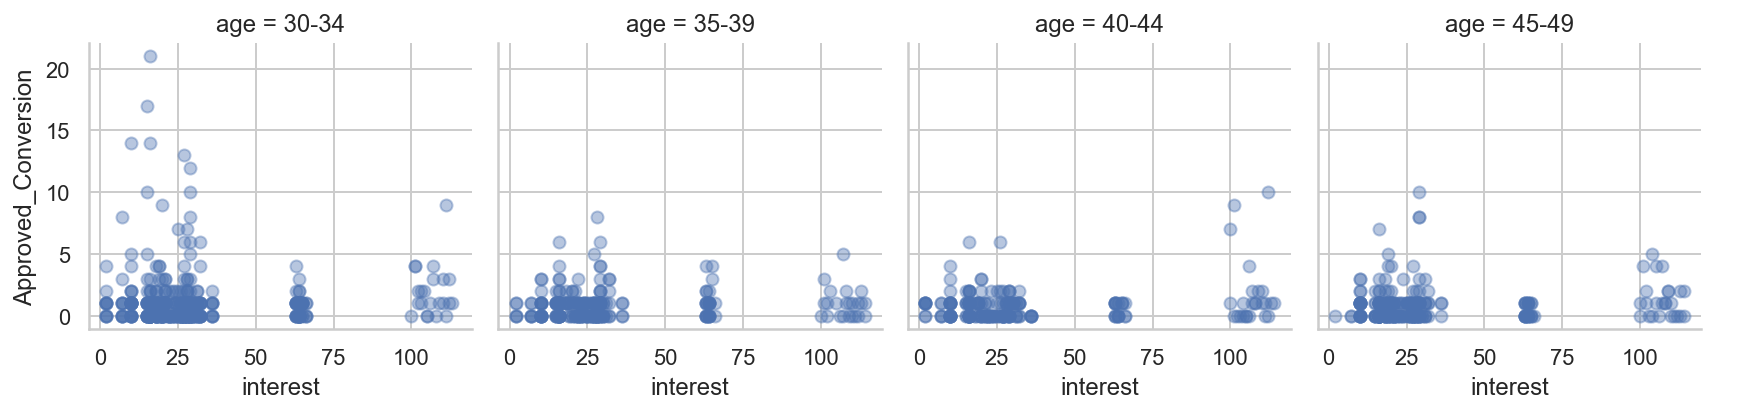

In [61]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

## Spent

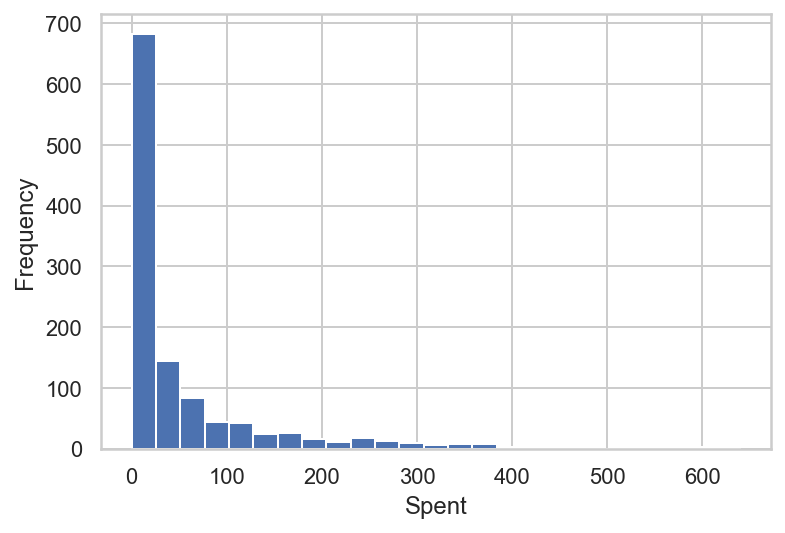

In [62]:
plt.hist(df['Spent'], bins = 25)
plt.xlabel("Spent")
plt.ylabel("Frequency")
plt.show()

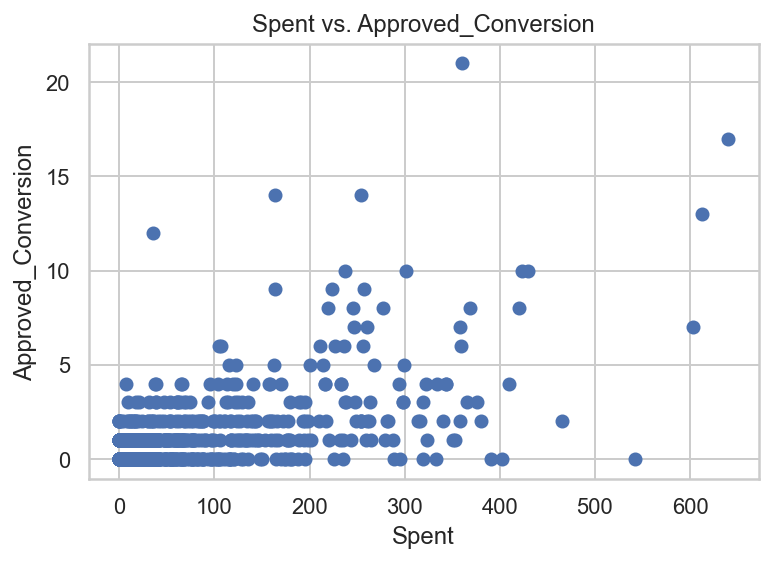

In [63]:
plt.scatter(df["Spent"], df["Approved_Conversion"])
plt.title("Spent vs. Approved_Conversion")
plt.xlabel("Spent")
plt.ylabel("Approved_Conversion")
plt.show()

광고에 사용된 돈의 양이 증가한다고 광고를 본 후 구매한 사람의 수가 눈에 띄게 증가하지는 않는다. (광고비 증가와 Approved_Convesrion 증가와 큰 상관관계가 없다는 사실을 알 수 있다.)

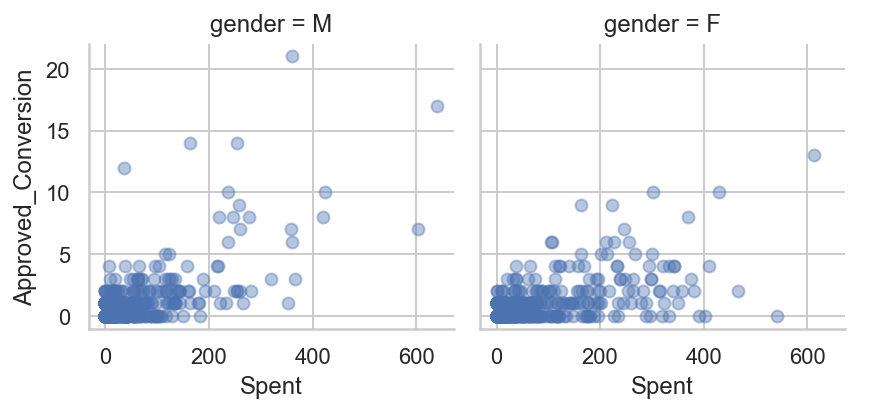

In [64]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend();

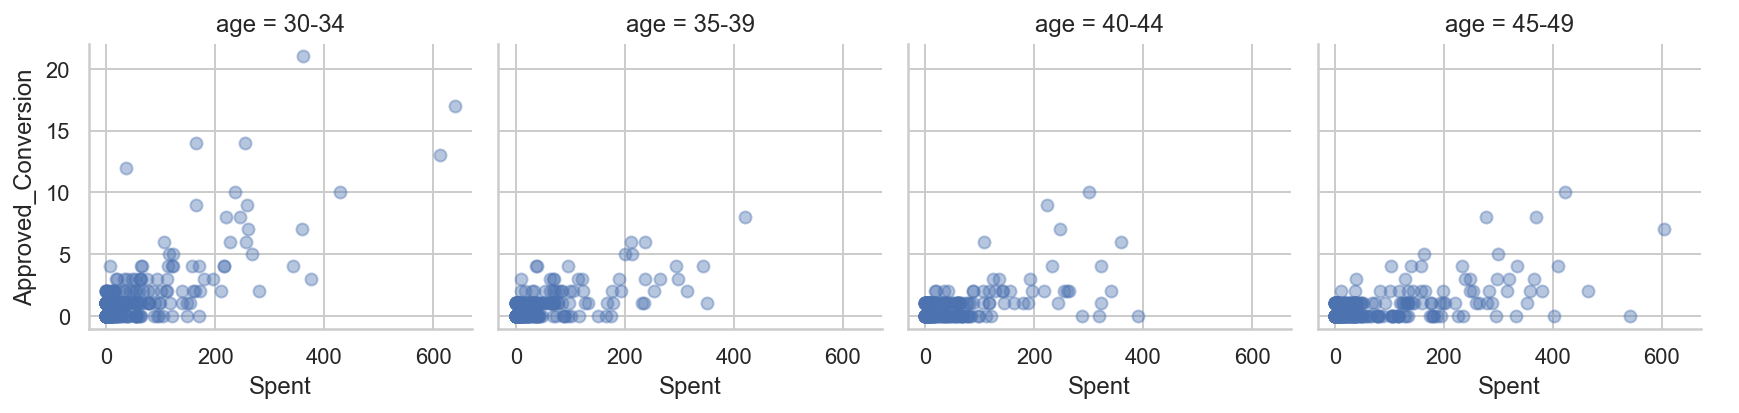

In [65]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend();

## Impressions

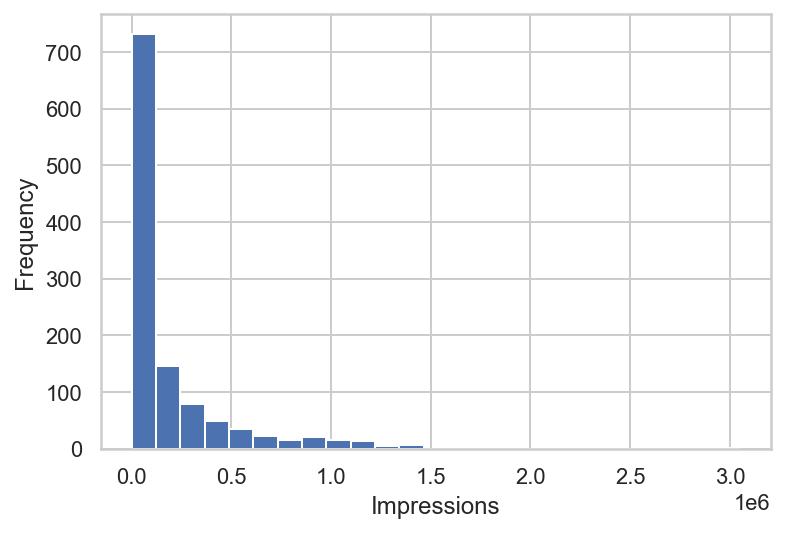

In [66]:
plt.hist(df['Impressions'], bins = 25)
plt.xlabel("Impressions")
plt.ylabel("Frequency")
plt.show()

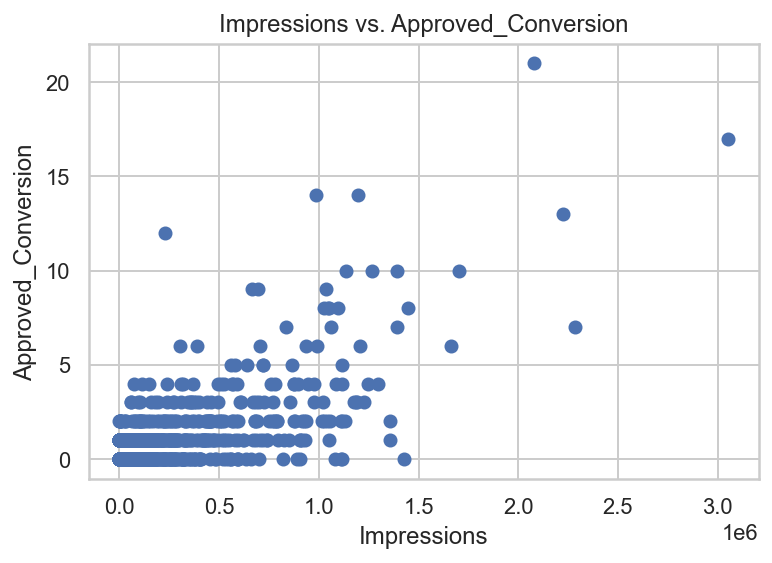

In [67]:
plt.scatter(df["Impressions"], df["Approved_Conversion"])
plt.title("Impressions vs. Approved_Conversion")
plt.xlabel("Impressions")
plt.ylabel("Approved_Conversion")
plt.show()

특정 노출수(1000000) 이후에 Approved Conversion의 급격한 증가가 있다.

# 광고를 클릭한 후에 누가 실제로 제품을 구매했을까?(click -> purchase)

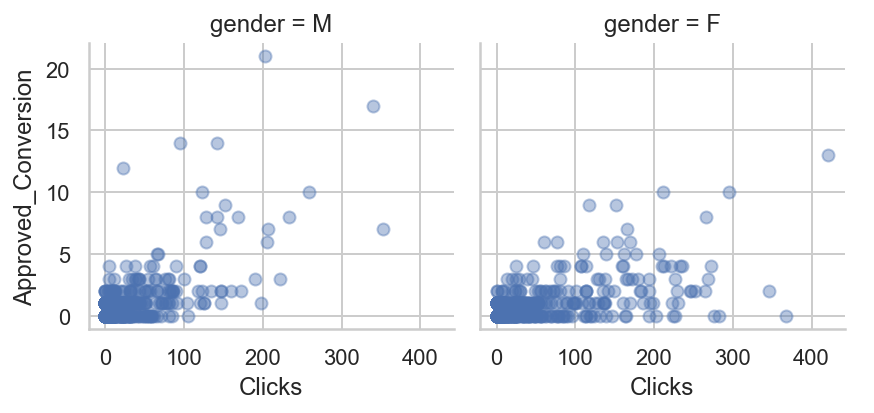

In [82]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

남자보다 여자가 클릭을 더 많이 하는 것으로 보이는데 실제 구매는 남자가 여자보다 더 많이 하는 것으로 보인다.

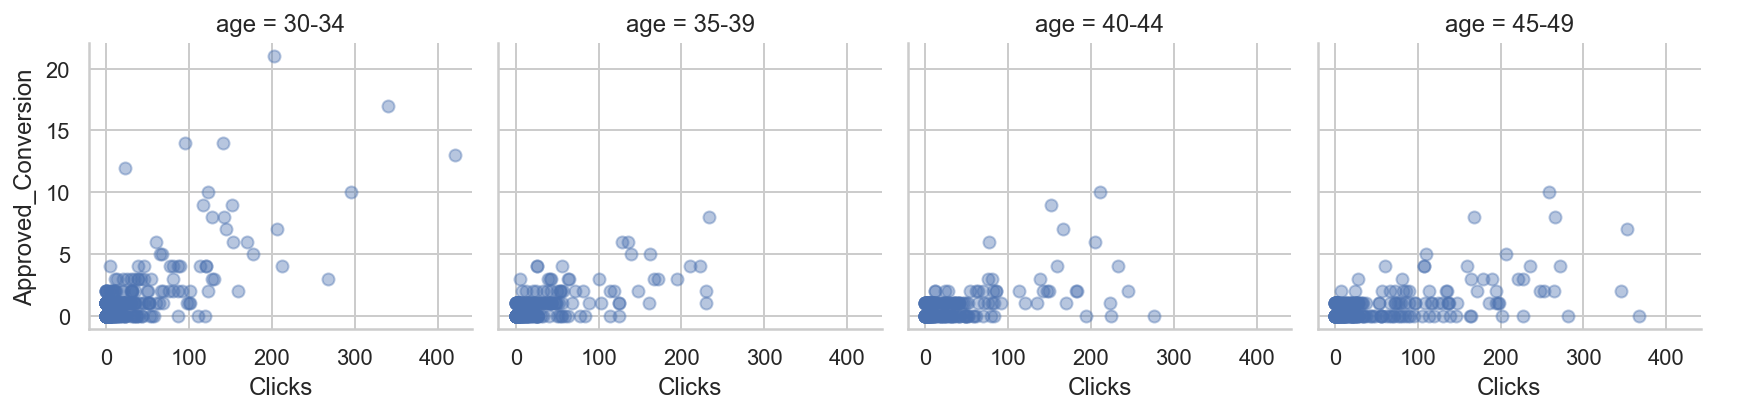

In [83]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

30-34세가 광고를 클릭후 실제 구매로 이어지는 경우가 많이 있었다.

# 제품 문의 후에 누가 실제로 제품을 구매했을까?(enquiring the product -> purchase)

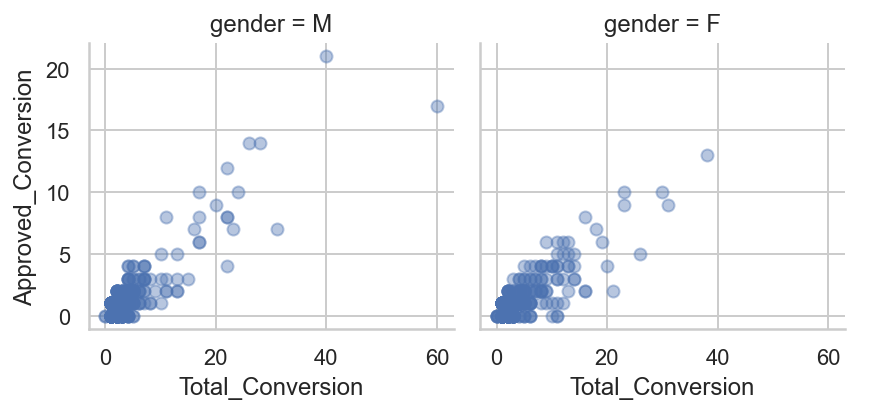

In [84]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend();

여성이 제품에 재한 문의가 더 많은 반면, 구매로 이어진 경우는 남성이 더 많은 것으로 나타난다.

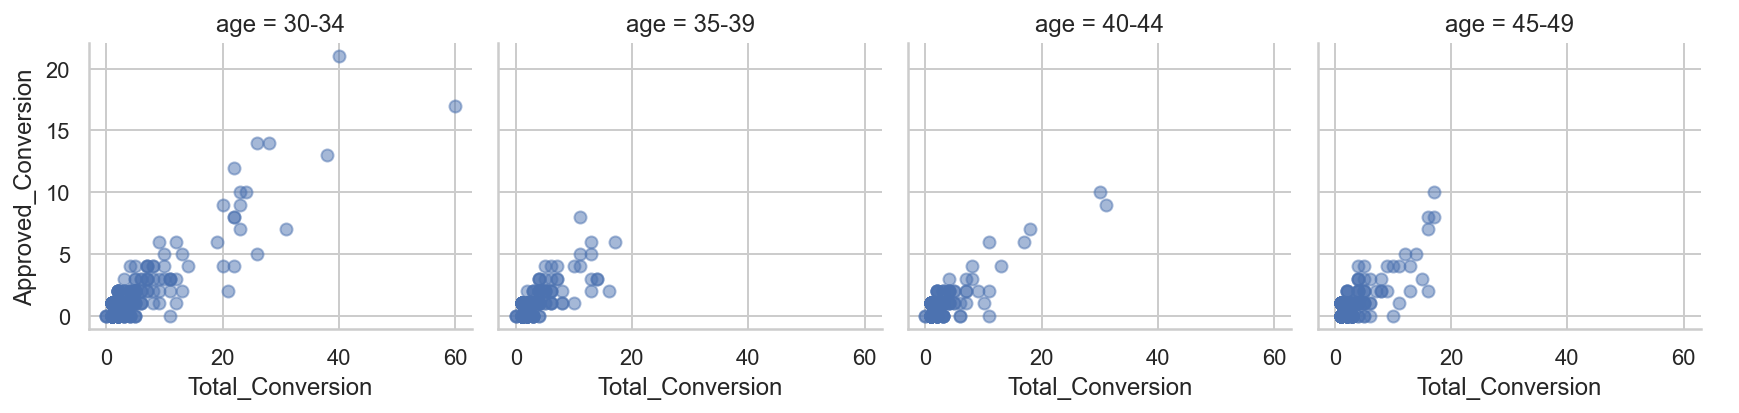

In [86]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion",alpha=.5)
g.add_legend();

30-34세가 제품에 대해 문의 후 상품을 구매하는 경우가 가장 많은 것으로 나타났다.

# campaign_c 더 깊게 살펴보기 (가장 많은 실제 구매를 이끌어낸 캠페인)

In [87]:
a=[] # campaign_id(XYZ 회사에서 부여한 각 AD의 캠페인 ID)
b=[] # fb_campaign_id(Facebook에서 부여한 각 AD의 캠페인 ID)
c=[] # approved_conversion
for i,j,k in zip(df.xyz_campaign_id, df.fb_campaign_id, df.Approved_Conversion):
    if i=="campaign_c":
        a.append(i),b.append(j),c.append(k)

In [89]:
d={'campaign_name':a, 'fb_campaign_id':b, 'Approved_Conversion':c}     
campaign_c = pd.DataFrame(d)
campaign_c.head()

,campaign_name,fb_campaign_id,Approved_Conversion
0,campaign_c,144531,14
1,campaign_c,144531,5
2,campaign_c,144531,1
3,campaign_c,144531,2
4,campaign_c,144531,2


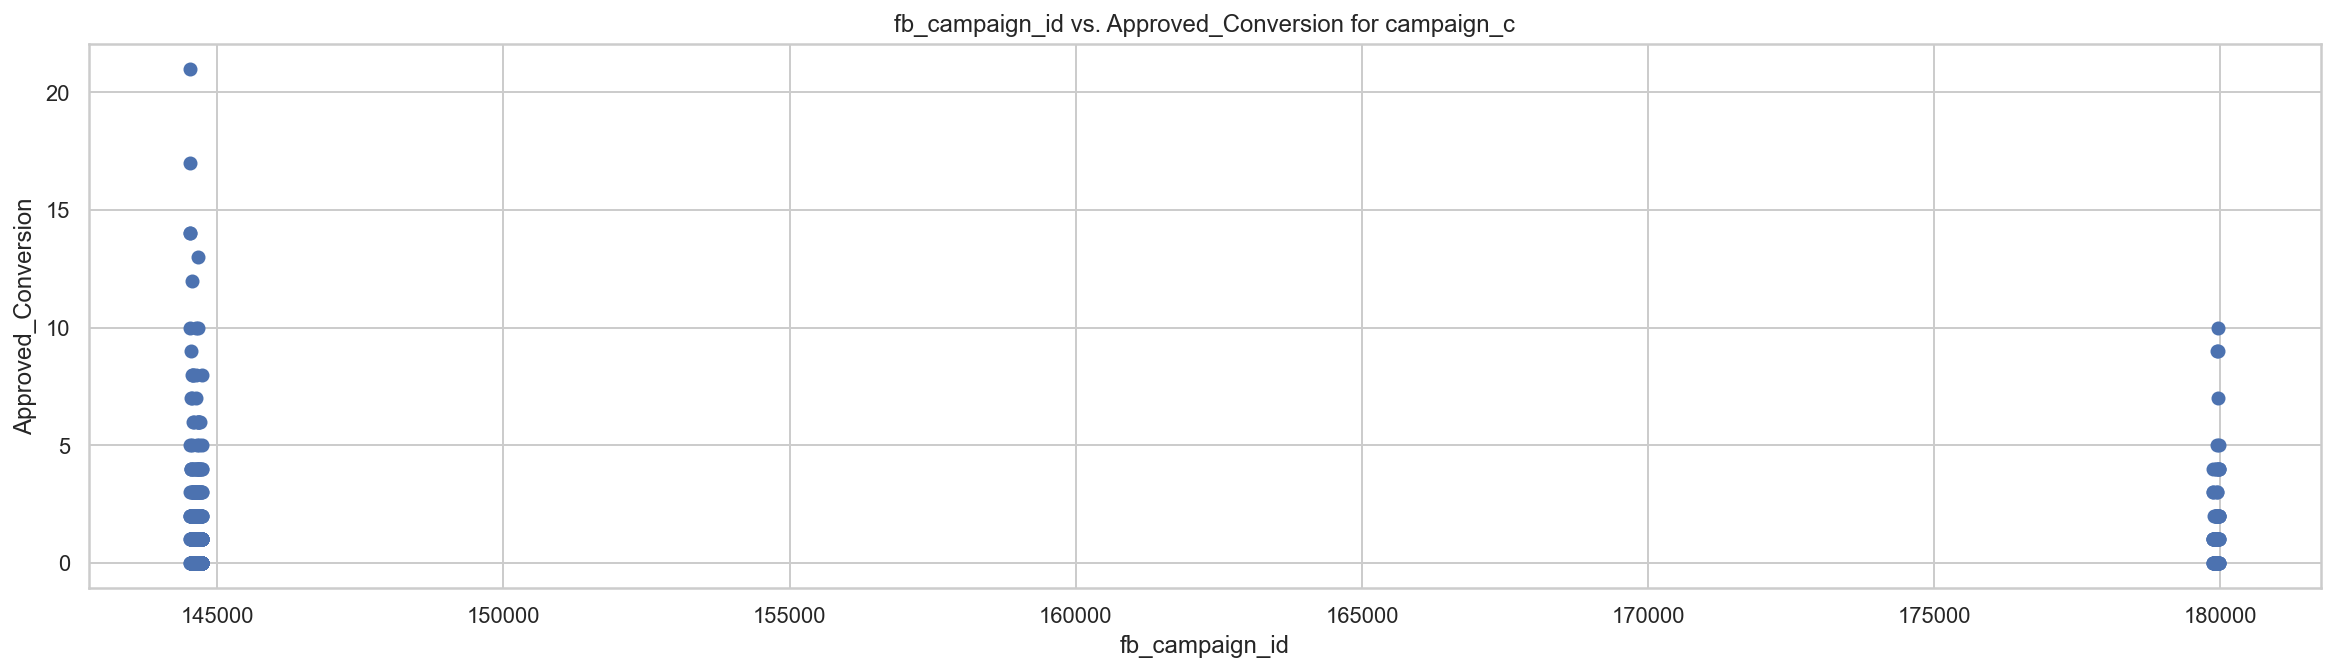

In [90]:
plt.figure(figsize=(20,5))
plt.scatter(campaign_c["fb_campaign_id"], campaign_c["Approved_Conversion"])
plt.title("fb_campaign_id vs. Approved_Conversion for campaign_c")
plt.xlabel("fb_campaign_id")
plt.ylabel("Approved_Conversion")
plt.show()

campaign_c에 대해 약 145000대의 fb_campaign_id들이 약 180000대의 fb_campaign_id보다 더 많은 구매로 이어지고 있는 것을 볼 수 있다.

# Summary

**Campaign_C**
- 캠페인 C가 광고를 본 후 구매로 이어진 경우가 가장 많았다

**age_group**
- 캠페인 C와 캠페인 B에서 30-34가 더 많은 관심을 보인 반면에, 캠페인 A에서는 40-44가 더 많은 관심을 보였다.

**gender**
- 두 성별 모두 3개의 캠페인에 대해 비슷한 관심을 보였다.

**interest**
- 비록 관심코드가 100이하인 경우보다 수는 적어도, 관심코드가 100보다 큰 사용자들로부터 실제 구매가 많이 이루어졌다.

**money spent**
- 광고 비용이 늘어난다고 제품 구매가 증가하지는 않았다.
- 일정 노출 수 이후, Approved_Conversion이 갑자기 증가했다.(구매로 이어졌다)

**Product bought after clicking the ad**
- 여성이 남성보다 더 많이 광고를 클릭하는 경향이 있지만, 남성이 여성보다 광고를 클릭 후 더 많은 구매로 이어졌다.
- 30-34세의 사람들이 광고를 클릭 후 제품을 구매하는 경향이 더 높았다.

**Product bought after enquiring the ad**
- 여성이 제품에 더 많은 문의를 했지만, 문의 후 구매로 이어진 경우는 남성이 더 많았다.
- 30-34세의 사람들이 제품 문의 후 구매로 이어지는 경우가 가장 많았다.

**Instructive_conclusion**
- 캠페인 C에 있어서, 145000대의 fb_campaign_id들이 180000대의 fb_campaingn_id들보다 더 많은 approved_conversion으로 이어졌다.

**Business Questions**

1) 소셜 광고 캠페인을 최적화하여 최대한 높은 전환율을 달성하는 방법 (최적의 전환율 달성/전환율 클릭율을 얻어라)   
=> 가장 높은 전환율을 달성한 campaign_c에 기여한 요소들을 고려해보자
- 더 잘 도달하기 위해서는 더 많은 광고를 해야 한다.
- 30-34세의 연령대가 주 타겟이 돼야 한다.
- interst가 100보다 큰 사람을 더 타켓팅해야 한다.
- 광고가 더 많이 노출될 수록 더 많은 전환(구매)로 이어질 것이다.

2) 적절한 클릭율로 완벽한 타겟 데모그래픽을 찾기
- 남성이 여성보다 광고 클릭 후 더 많은 구매로 이어졌다.
- 30-34세의 연령대가 광고 클릭 후 더 많은 구매로 이어졌다.

3) 각각의 캠페인 성과를 비교해 조정된 타겟에 대해 최고의 크리에이티브/캠페인을 다시 실행할 수 있다.
- 캠페인 C가 캠페인 중 가장 많이 클릭 후 전환으로 이어졌다.
- 또한, 캠페인 A는 광고의 수를 고려할 때 꽤 효과가 있다. 광고의 수가 적지만, 광고의 수가 더 많은 campaign_b보다 더 나은 성과를 거두었다.

---

# 해당 분석에 대한 나의 생각

> **참고**   
https://brunch.co.kr/@ggoomin/4  
https://mygrowthlog.tistory.com/20   
https://brunch.co.kr/@jahyun376/5

**1. 상관분석 결과에서 노출수는 클릭수, 비용과 강한 양적 상관관계가 있다했는데 어떻게 해석할 수 있을까?**
- 실제로 광고가 많이 노출되려면 지면에 대해 실시간 입찰 경쟁에서 이겨야 하고, 그러려면 많은 비용을 쓸 수 밖에 없다. 인과관계를 명확하게 알 수는 없지만 더 많은 비용을 들이면 대체로 입찰에서 우위에 있고(노출이 더 많이 발생하게 되고), 더 많은 노출은 노출이 안 되는 것보다 더 많은 클릭으로 이어질 수 있다.(이건 광고 소재와 타겟팅이 얼마나 적절했는지에 따라 다르겠지만) 그렇다고 더 많은 클릭이 더 많은 구매(전환)로 이어지기는 쉽지 않다.
    
**2. Total_Conversion(제품에 대한 문의수)는 클릭수, 비용보다 '광고를 본 후 전환'과 더 강한 양적 상관관계가 있다는 어떻게 해석할 수 있을까?**
- 단순히 클릭의 경우 많은 변수가 있다. 광고를 닫으려다가 클릭을 누르는 등은 해당 상품에 대해 문의하기 위해 클릭한 것인지 확인하기 어렵기 때문이다. 또, 앞서 언급했듯 많은 광고 비용을 들였다고 무조건 더 큰 전환으로 이어지지 않는다.(아무리 예산을 많이 쓰더라도 사용자의 관심을 끌지 못하는 광고는 효과가 없기 때문). 
- 반면에, '광고를 보고 문의를 했다'는 '구매하고자 하는 의도'를 내포하고 있기 때문에 클릭수, 비용 보다는 광고를 본 후 구매로 이어진 수와 더 강한 상관관계가 있을 수 있었다고 생각한다. (선후 관계가 어떻든지 간)


**3. 가장 많은 구매를 이끌어내기 위해 어떤 캠페인 전략을 사용해봐야할까?**
- 위의 분석 요약에서 캠페인 C가 더 성공하기 위해서는 더 많은 광고를 해야 한다고 했지만, 단순히 광고를 늘린다고 무조건 더 높은 전환으로 이어지지는 않는다.
- 30~34세의 전환수가 높았기 때문에 해당 연령대를 타겟팅하라고 했는데, 단순히 캠페인 C의 모든 광고의 타겟팅을 30-34세로 설정하기보다는 각 광고별로 세분화해서 타겟팅이 이뤄져야 한다.
- 광고의 개수는 캠페인 B가 가장 많은데, 전환은 C에서 가장 많이 발생했기 때문에 B보다 C의 캠페인 예산을 더 투자하는 것을 고려해볼 수 있다.

In [87]:
# 캠페인별 광고 개수
print(f" 캠페인 A의 광고개수: {df[df['xyz_campaign_id'] == 'campaign_a']['fb_campaign_id'].nunique()}")
print(f" 캠페인 B의 광고개수: {df[df['xyz_campaign_id'] == 'campaign_b']['fb_campaign_id'].nunique()}")
print(f" 캠페인 C의 광고개수: {df[df['xyz_campaign_id'] == 'campaign_c']['fb_campaign_id'].nunique()}")

 캠페인 A의 광고개수: 47
 캠페인 B의 광고개수: 367
 캠페인 C의 광고개수: 277


In [91]:
df.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0


In [135]:
pd.pivot_table(df, index="xyz_campaign_id", values="Approved_Conversion", aggfunc=["mean", "count"])

,mean,count
,Approved_Conversion,Approved_Conversion
xyz_campaign_id,,
campaign_a,0.444444,54
campaign_b,0.394397,464
campaign_c,1.395200,625
